In [1]:
import math
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('clean.csv')

In [3]:
# df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df.dtypes

datetime     object
total       float64
dtype: object

In [5]:
df=df.set_index('datetime')

In [6]:
# import seaborn as sns
# sns.set(rc={'figure.figsize':(18,8)})

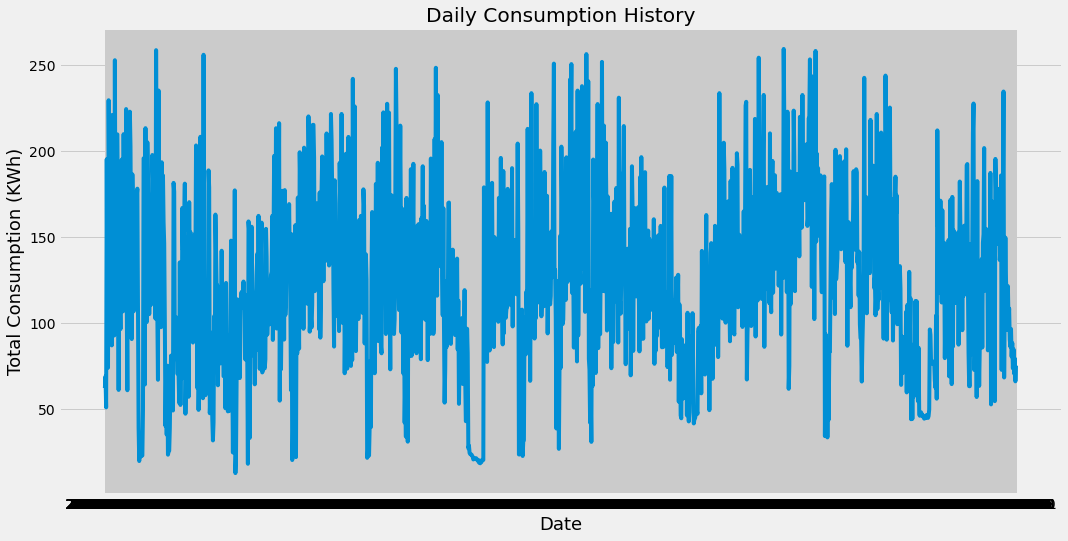

In [7]:


plt.figure(figsize=(16,8))
plt.title("Daily Consumption History")
plt.plot(df['total'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Consumption (KWh)',fontsize=18)
plt.show()

In [8]:
data=df.filter(['total'])
dataset=data.values

training_data_len=math.ceil(len(dataset)*0.8)

training_data_len


1168

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.20041347],
       [0.22789736],
       [0.15489075],
       ...,
       [0.2701028 ],
       [0.21638379],
       [0.25329206]])

In [10]:
train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.20041347, 0.22789736, 0.15489075, 0.7400381 , 0.33142811,
       0.24840893, 0.87907901, 0.67801694, 0.58603916, 0.60606429,
       0.59487616, 0.30106612, 0.84454173, 0.71664843, 0.69775832,
       0.32437472, 0.97340792, 0.50828976, 0.33714378, 0.79849203,
       0.79849203, 0.57197292, 0.19607605, 0.66480198, 0.46094288,
       0.33945438, 0.65474888, 0.73934898, 0.62357615, 0.38136933,
       0.79914062, 0.54371884, 0.42182496, 0.42182496, 0.85824314,
       0.40621833, 0.19534639, 0.70979772, 0.46459119, 0.46726661,
       0.85204102, 0.77104868, 0.52109936, 0.31602416, 0.70448741,
       0.61222587, 0.38136933, 0.39969192, 0.39969192, 0.66200495,
       0.63537233, 0.65341116, 0.67055819, 0.4054076 , 0.10689529,
       0.02841623, 0.07592525, 0.03850987, 0.04155012, 0.040861  ])]
[0.04138797681300417]



In [11]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [12]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1108, 60, 1)

In [13]:
model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
tf.keras.layers.Lambda(lambda x: x * 400)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [72]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss="mean_squared_error",
              optimizer=optimizer)
#model.compile(optimizer="adam",loss="mean_squared_error")

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [74]:
history=model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1,callbacks=[lr_schedule])

Epoch 1/100
11/11 [==============================] - 2s 194ms/step - loss: 0.2045 - lr: 1.0000e-08
Epoch 2/100
11/11 [==============================] - 2s 204ms/step - loss: 0.2045 - lr: 1.1220e-08
Epoch 3/100
11/11 [==============================] - 2s 193ms/step - loss: 0.2045 - lr: 1.2589e-08
Epoch 4/100
11/11 [==============================] - 2s 194ms/step - loss: 0.2045 - lr: 1.4125e-08
Epoch 5/100
11/11 [==============================] - 2s 196ms/step - loss: 0.2045 - lr: 1.5849e-08
Epoch 6/100
11/11 [==============================] - 2s 194ms/step - loss: 0.2045 - lr: 1.7783e-08
Epoch 7/100
11/11 [==============================] - 2s 199ms/step - loss: 0.2045 - lr: 1.9953e-08
Epoch 8/100
11/11 [==============================] - 2s 192ms/step - loss: 0.2045 - lr: 2.2387e-08
Epoch 9/100
11/11 [==============================] - 2s 198ms/step - loss: 0.2045 - lr: 2.5119e-08
Epoch 10/100
11/11 [==============================] - 2s 199ms/step - loss: 0.2045 - lr: 2.8184e-08
Epoch 11/

11/11 [==============================] - 2s 191ms/step - loss: 0.0473 - lr: 1.2589e-04
Epoch 84/100
11/11 [==============================] - 2s 196ms/step - loss: 0.0428 - lr: 1.4125e-04
Epoch 85/100
11/11 [==============================] - 2s 188ms/step - loss: 0.0392 - lr: 1.5849e-04
Epoch 86/100
11/11 [==============================] - 2s 187ms/step - loss: 0.0364 - lr: 1.7783e-04
Epoch 87/100
11/11 [==============================] - 2s 186ms/step - loss: 0.0342 - lr: 1.9953e-04
Epoch 88/100
11/11 [==============================] - 2s 184ms/step - loss: 0.0327 - lr: 2.2387e-04
Epoch 89/100
11/11 [==============================] - 2s 189ms/step - loss: 0.0317 - lr: 2.5119e-04
Epoch 90/100
11/11 [==============================] - 2s 185ms/step - loss: 0.0312 - lr: 2.8184e-04
Epoch 91/100
11/11 [==============================] - 2s 186ms/step - loss: 0.0308 - lr: 3.1623e-04
Epoch 92/100
11/11 [==============================] - 2s 183ms/step - loss: 0.0307 - lr: 3.5481e-04
Epoch 93/100


Text(0, 0.5, 'MSE')

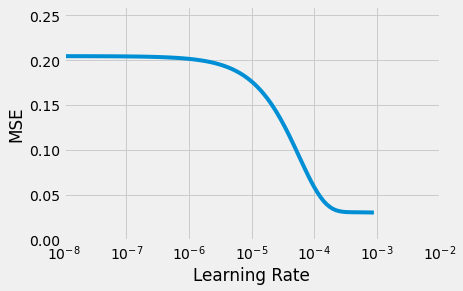

In [77]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-2, 0, 0.26])
plt.xlabel('Learning Rate')
plt.ylabel('MSE')

In [78]:
optimizer = tf.keras.optimizers.SGD(lr=8e-4, momentum=0.9)
model.compile(loss="mean_squared_error",
              optimizer=optimizer)


history = model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1)

Epoch 1/100
11/11 [==============================] - 3s 244ms/step - loss: 0.0302
Epoch 2/100
11/11 [==============================] - 2s 223ms/step - loss: 0.0302
Epoch 3/100
11/11 [==============================] - 2s 191ms/step - loss: 0.0301
Epoch 4/100
11/11 [==============================] - 2s 194ms/step - loss: 0.0301
Epoch 5/100
11/11 [==============================] - 2s 218ms/step - loss: 0.0300
Epoch 6/100
11/11 [==============================] - 3s 240ms/step - loss: 0.0300
Epoch 7/100
11/11 [==============================] - 2s 221ms/step - loss: 0.0299
Epoch 8/100
11/11 [==============================] - 3s 291ms/step - loss: 0.0298
Epoch 9/100
11/11 [==============================] - 3s 269ms/step - loss: 0.0298
Epoch 10/100
11/11 [==============================] - 2s 224ms/step - loss: 0.0297
Epoch 11/100
11/11 [==============================] - 2s 188ms/step - loss: 0.0297
Epoch 12/100
11/11 [==============================] - 2s 193ms/step - loss: 0.0296
Epoch 13/100


In [84]:
mse=history.history['loss']

epochs=100 # Get number of epochs

plt.plot(epochs, loss, 'g')
plt.title('loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss"])

plt.figure()

NameError: name 'loss' is not defined

In [85]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [86]:
x_test=np.array(x_test)

In [87]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [88]:
predictions=model.predict(x_test)

predictions= scaler.inverse_transform(predictions)

In [89]:
rmse= np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

45.59426003609278

<ipython-input-63-e499e91a23da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


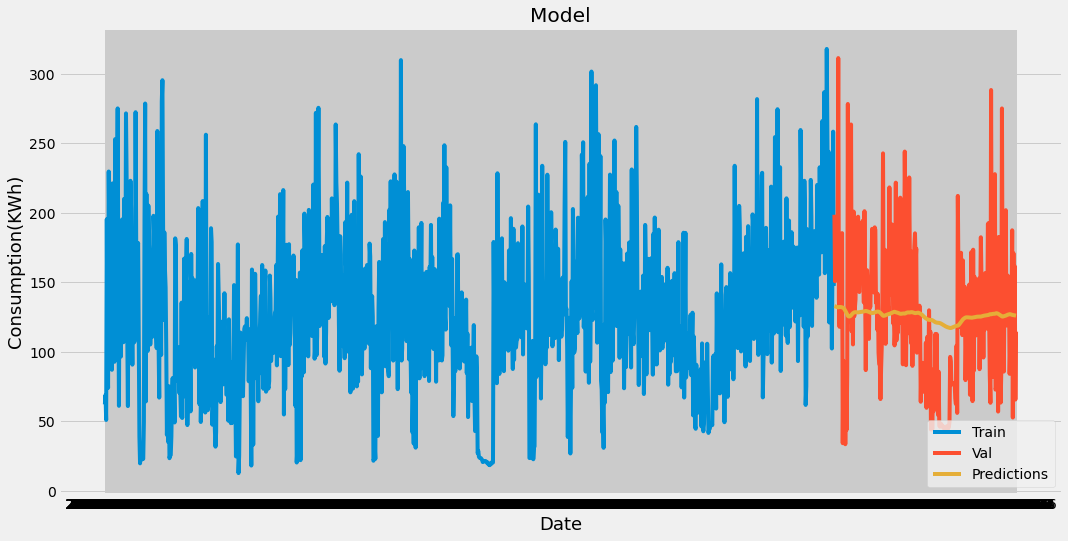

In [63]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Consumption(KWh)',fontsize=18)
plt.plot(train['total'])
plt.plot(valid[['total','Predictions']])
plt.legend(["Train","Val","Predictions"],loc='lower right')
plt.show()

In [90]:
valid

,total,Predictions
datetime,,
2010-02-15,198.65,132.990829
2010-02-16,150.82,132.806870
2010-02-17,190.31,132.620682
2010-02-18,162.34,132.468140
2010-02-19,170.64,132.319733
...,...,...
2010-11-22,171.01,126.409904
2010-11-23,99.40,126.325340
2010-11-24,161.68,126.232048


In [91]:
#predict

last_30_days= data[-60:].values

last_30_days_scaled = scaler.transform(last_30_days)

X_test=[]
X_test.append(last_30_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_consumption=model.predict(X_test)

pred_consumption= scaler.inverse_transform(pred_consumption)

print(pred_consumption)

[[127.15858]]


In [92]:
def evaluate(pre,test_labels):
    errors=abs(pre-test_labels)
    mape=100*np.mean(errors/test_labels)
    accuracy= 100-mape
    print("Accuracy: {:0.2f}%".format(accuracy))

In [93]:
evaluate(predictions,y_test)

Accuracy: 62.25%
